In [15]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [16]:
input_path_A = input("Entre com o path da 1ª imagem de entrada: ")
input_path_B = input("Entre com o path da 2ª imagem de entrada: ")
output_path = input("Entre com o path da pasta de saída (esta pasta deve existir): ")

In [17]:
# read images as grayscale
img_A = cv2.imread(input_path_A, 0)
img_B = cv2.imread(input_path_B, 0)

In [18]:
surf = cv2.xfeatures2d.SURF_create()

In [19]:
# get descriptors using surf
kp_A_surf, des_A_surf = surf.detectAndCompute(img_A,None)
kp_B_surf, des_B_surf = surf.detectAndCompute(img_B,None)

kpA: 5440
kpB: 4766


In [20]:
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

In [21]:
matches = bf.match(des_A_surf,des_B_surf)
matches = sorted(matches, key = lambda x:x.distance)

matches: 2441


In [22]:
max = int(input('Entre com o valor máximo de distância tolerável para os matches: '))
good_matches = []
for m in matches:
    if m.distance < max:
        good_matches.append(m)

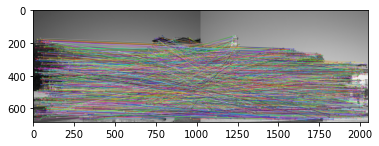

(<matplotlib.image.AxesImage at 0x7f32d57aefd0>, None)

In [23]:
img_C = cv2.drawMatches(img_A, kp_A_surf, img_B, kp_B_surf, good_matches, None, flags=2)
plt.imshow(img_C),plt.show()

In [24]:
src_pts = np.float32([ kp_A_surf[m.queryIdx].pt for m in good_matches ]).reshape(-1,1,2)
dst_pts = np.float32([ kp_B_surf[m.trainIdx].pt for m in good_matches ]).reshape(-1,1,2)
H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

In [25]:
width = img_A.shape[1] + img_B.shape[1]
height = img_A.shape[0] + img_B.shape[0]

In [26]:
img_out = cv2.warpPerspective(img_A, H, (width, height))
img_out[0:img_B.shape[0], 0:img_B.shape[1]] = img_B

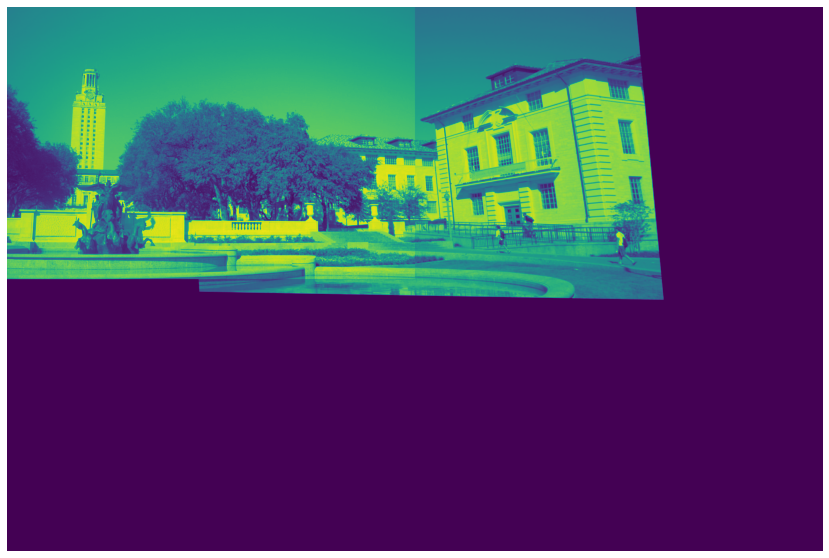

In [27]:
plt.figure(figsize=(20,10))
plt.imshow(img_out)

plt.axis('off')
plt.show()

In [28]:
cv2.imwrite(output_path + '/surf.jpg', img_out)

True